In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb

#https://oracleselixir.com/stats/champions/explorer
#12.01~13.06 Champion Stats Explorer

In [63]:
League = pd.read_csv('Champion Stats - OraclesElixir.csv')

In [64]:
League

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,Aatrox,Middle,1,0.0%,1.8%,6.5%,100%,100%,4,2,...,346,642,15,6.8,18.9%,496,19.7%,19.5%,0.58,0.39
1,Aatrox,Top,145,4.7%,1.8%,6.5%,42%,65%,360,424,...,16,104,1.7,8.2,25.4%,467,23.2%,22.6%,0.37,0.20
2,Ahri,Middle,699,22.8%,19.5%,42.3%,51%,40%,2225,1285,...,36,3,0.4,8.5,25.4%,513,25.2%,22.9%,0.53,0.32
3,Akali,Middle,250,8.2%,15.0%,25.4%,42%,68%,984,588,...,-108,22,-2.8,8.2,24.7%,480,24.2%,23.2%,0.26,0.21
4,Akali,Top,71,2.3%,15.0%,25.4%,54%,66%,294,209,...,-65,93,-5.1,7.7,23.0%,461,24.4%,21.9%,0.32,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Ziggs,Middle,6,0.2%,2.6%,4.7%,83%,33%,26,7,...,431,279,1.8,8.4,25.6%,930,34.5%,27.1%,0.49,0.14
258,Zilean,Middle,27,0.9%,1.5%,2.7%,70%,70%,49,30,...,-135,39,-5.3,8.0,22.5%,331,17.3%,20.2%,0.41,0.15
259,Zilean,Support,9,0.3%,1.5%,2.7%,22%,100%,3,23,...,-111,171,4.6,1.2,2.7%,85,5.2%,8.8%,1.68,0.42
260,Zoe,Middle,74,2.4%,2.1%,4.5%,45%,62%,213,132,...,92,44,0,7.8,22.8%,529,27.6%,21.9%,0.41,0.24


In [65]:
League.isnull().sum()

Champion    0
Pos         0
GP          0
P%          0
B%          0
P+B%        0
W%          0
CTR%        0
K           0
D           0
A           0
KDA         0
KP          0
DTH%        0
FB%         0
GD10        0
XPD10       0
CSD10       0
CSPM        0
CS%P15      0
DPM         0
DMG%        0
GOLD%       0
WPM         0
WCPM        0
dtype: int64

In [66]:
gp_data = League[["Champion","Pos","GP"]]
gp_data["Champion"] = gp_data["Champion"] +'(' +gp_data["Pos"] + ')'

gp_data_with_pos = gp_data

gp_data_with_pos

C:\Users\0508t\AppData\Local\Temp\ipykernel_7264\772213585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_data["Champion"] = gp_data["Champion"] +'(' +gp_data["Pos"] + ')'


,Champion,Pos,GP
0,Aatrox(Middle),Middle,1
1,Aatrox(Top),Top,145
2,Ahri(Middle),Middle,699
3,Akali(Middle),Middle,250
4,Akali(Top),Top,71
...,...,...,...
257,Ziggs(Middle),Middle,6
258,Zilean(Middle),Middle,27
259,Zilean(Support),Support,9
260,Zoe(Middle),Middle,74


In [92]:
gp_data_with_pos_filtered = gp_data_with_pos[["Champion","GP"]]
gp_data_with_pos_filtered = gp_data_with_pos_filtered.sort_values(by=['GP'],ascending=False)

gp_data_with_pos_filtered

,Champion,GP
14,Aphelios(ADC),1204
130,Nautilus(Support),920
254,Zeri(ADC),835
238,Wukong(Jungle),811
78,Jinx(ADC),783
...,...,...
191,Soraka(Middle),1
198,Syndra(ADC),1
210,Trundle(Top),1
217,Udyr(Top),1


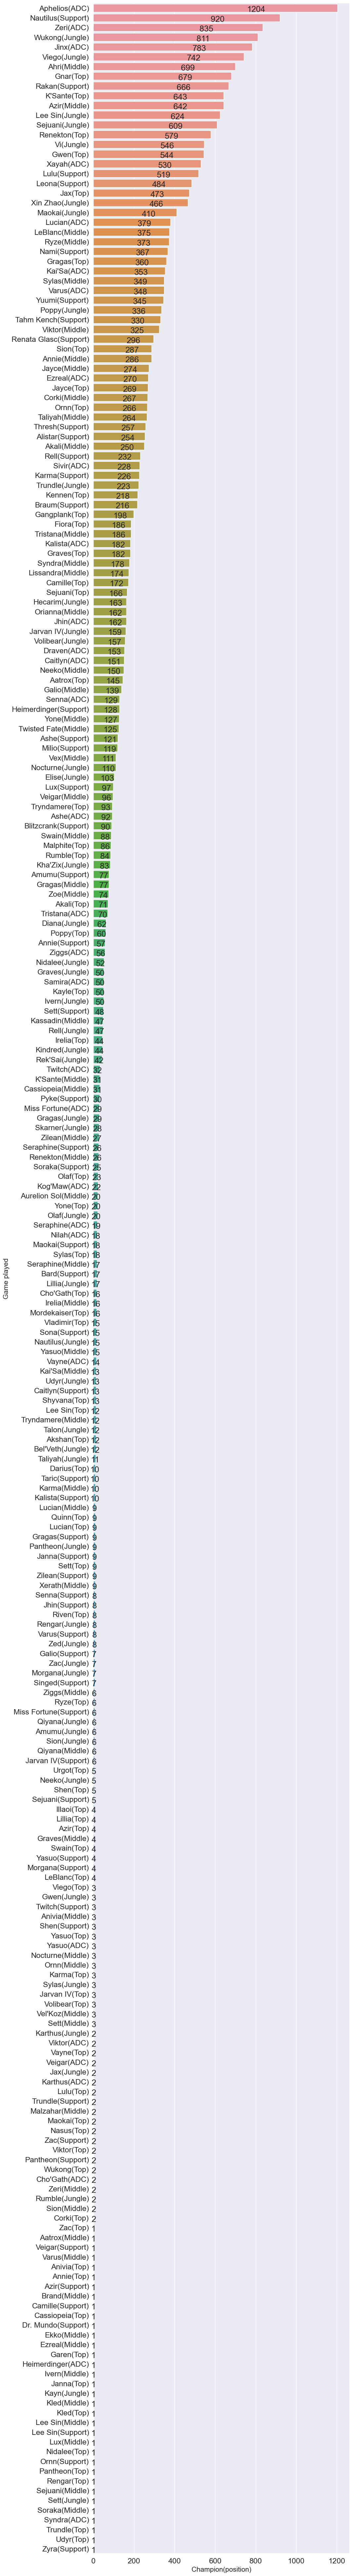

In [90]:

plt.figure(figsize=(10,100))
sb.set(font_scale=1.5)
gp_plot = sb.barplot(y='Champion',x='GP',data=gp_data_with_pos_filtered,orient='h',errorbar=None)
gp_plot.set_xlabel("Champion(position)",fontsize="15")
gp_plot.set_ylabel("Game played",fontsize="15")



for p in gp_plot.patches:
    gp_plot.text(p.get_x() + (p.get_width()*2.0/3.0) ,  
            p.get_y() + p.get_height(),   
            f"{p.get_width():.0f}",    
            ha = 'center' )   




plt.show()
#https://blog.naver.com/PostView.naver?blogId=kiddwannabe&logNo=222655678945&categoryNo=0&parentCategoryNo=0&currentPage=1

In [68]:
leagueFiltered = League.loc[(League['GP'])>20]

In [69]:
leagueFiltered["Champion"] = leagueFiltered["Champion"] +'(' +leagueFiltered["Pos"] + ')'

C:\Users\0508t\AppData\Local\Temp\ipykernel_7264\1991823725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leagueFiltered["Champion"] = leagueFiltered["Champion"] +'(' +leagueFiltered["Pos"] + ')'


In [75]:
w_relation = leagueFiltered[["Champion","Pos","W%","FB%"]]

In [76]:
w_relation['W%'] = w_relation['W%'].astype(str).str.rstrip('%').astype('float')/100.0

w_relation['FB%'] = w_relation['FB%'].astype(str).str.rstrip('%').astype('float')/100.0

w_relation = w_relation.rename(columns={'W%':'W'})

w_relation = w_relation.rename(columns={'FB%':'FB'})

w_relation

C:\Users\0508t\AppData\Local\Temp\ipykernel_7264\4006246184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_relation['W%'] = w_relation['W%'].astype(str).str.rstrip('%').astype('float')/100.0
C:\Users\0508t\AppData\Local\Temp\ipykernel_7264\4006246184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_relation['FB%'] = w_relation['FB%'].astype(str).str.rstrip('%').astype('float')/100.0


,Champion,Pos,W,FB
1,Aatrox(Top),Top,0.42,0.04
2,Ahri(Middle),Middle,0.51,0.09
3,Akali(Middle),Middle,0.42,0.07
4,Akali(Top),Top,0.54,0.13
6,Alistar(Support),Support,0.47,0.14
...,...,...,...,...
249,Yuumi(Support),Support,0.49,0.12
254,Zeri(ADC),ADC,0.53,0.10
256,Ziggs(ADC),ADC,0.48,0.04
258,Zilean(Middle),Middle,0.70,0.19


In [96]:
w_relation['W/FB'] = w_relation['W'] / w_relation['FB']

w_relation.sort_values(by=['W/FB'],ascending=False)

w_relation

,Champion,Pos,W,FB,W/FB
158,Renekton(Middle),Middle,0.35,0.00,inf
193,Swain(Middle),Middle,0.51,0.03,17.000000
256,Ziggs(ADC),ADC,0.48,0.04,12.000000
148,Poppy(Top),Top,0.60,0.05,12.000000
139,Olaf(Top),Top,0.43,0.04,10.750000
...,...,...,...,...,...
86,Karma(Support),Support,0.41,0.21,1.952381
69,Jarvan IV(Jungle),Jungle,0.49,0.27,1.814815
8,Amumu(Support),Support,0.44,0.25,1.760000
154,Rek'Sai(Jungle),Jungle,0.38,0.24,1.583333


<Axes: xlabel='FB', ylabel='W'>

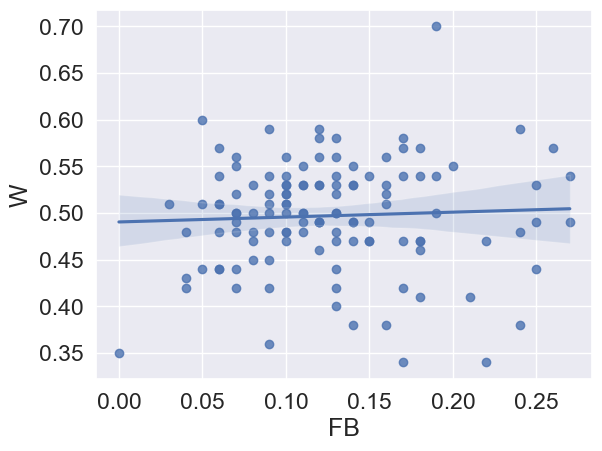

In [85]:
sb.regplot(data=w_relation,x='FB',y='W')

<Axes: xlabel='FB', ylabel='W'>

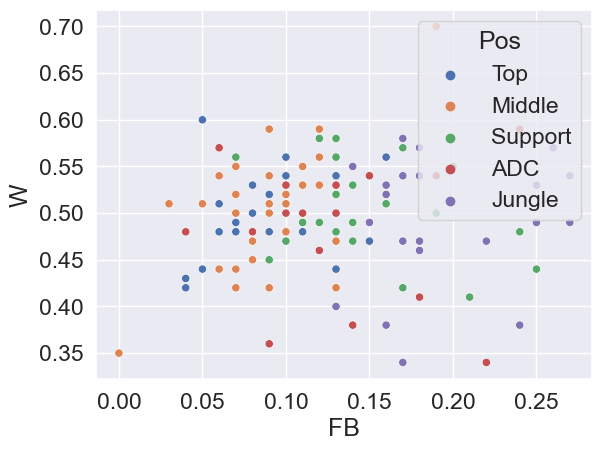

In [81]:
sb.scatterplot(data=w_relation,x='FB',y='W',hue='Pos')

<Axes: title={'center': 'Jungle'}, xlabel='First Blood', ylabel='W'>

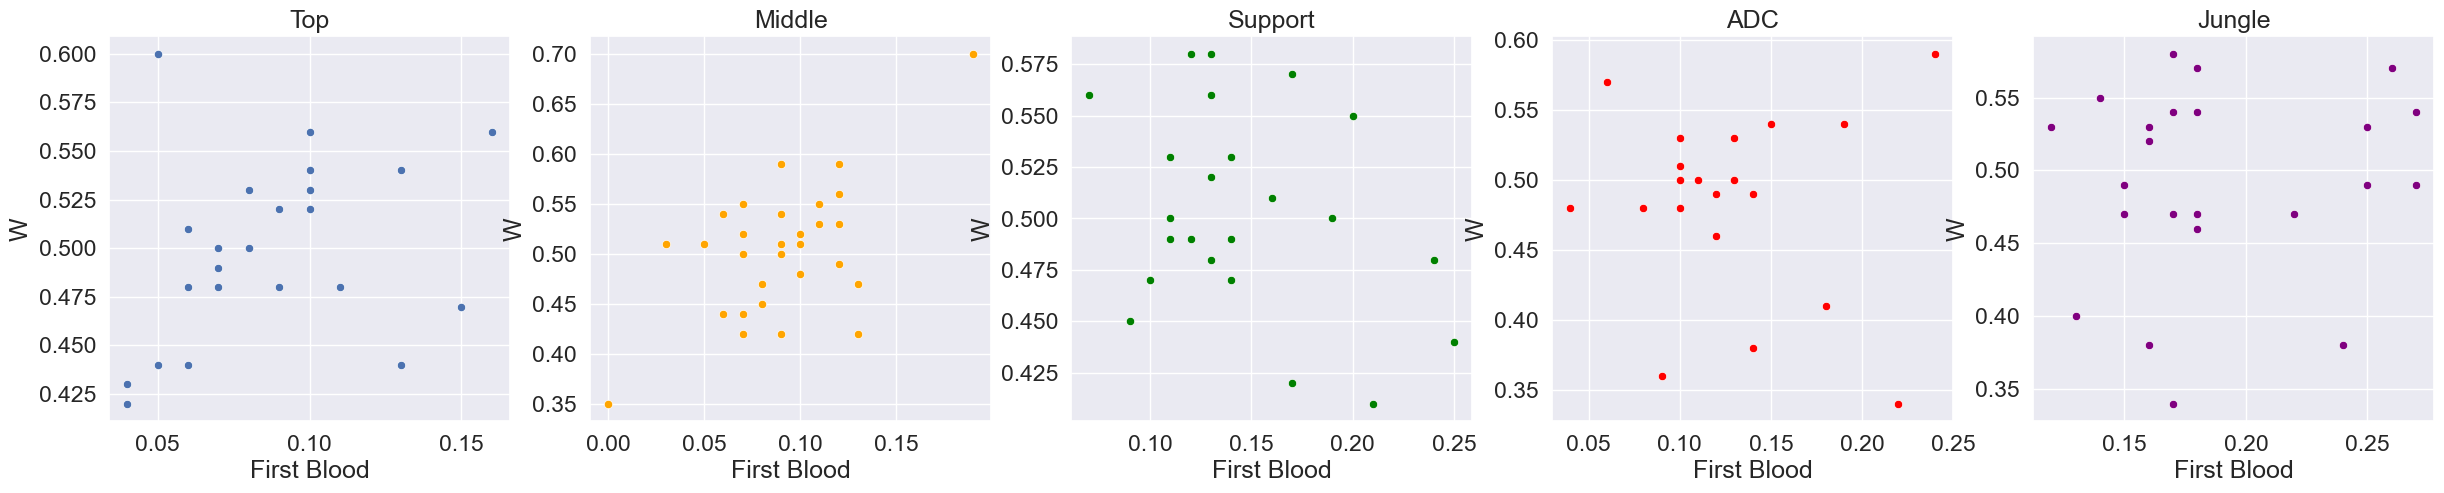

In [83]:

fig,ax = plt.subplots(ncols=5,figsize=(30,5))
ax[0].set_title("Top")
ax[1].set_title("Middle")
ax[2].set_title("Support")
ax[3].set_title("ADC")
ax[4].set_title("Jungle")

for a in ax:
    a.set_xlabel('First Blood')

sb.scatterplot(data=w_relation.loc[w_relation['Pos']=='Top',:],x='FB',y='W',ax=ax[0])
sb.scatterplot(data=w_relation.loc[w_relation['Pos']=='Middle',:],x='FB',y='W',ax=ax[1],color='orange')
sb.scatterplot(data=w_relation.loc[w_relation['Pos']=='Support',:],x='FB',y='W',ax=ax[2],color='green')
sb.scatterplot(data=w_relation.loc[(w_relation['Pos']=='ADC') ,:],x='FB',y='W',ax=ax[3],color='red')
sb.scatterplot(data=w_relation.loc[(w_relation['Pos']=='Jungle'),:],x='FB',y='W',ax=ax[4],color='purple')


<Axes: title={'center': 'Jungle'}, xlabel='FB', ylabel='W'>

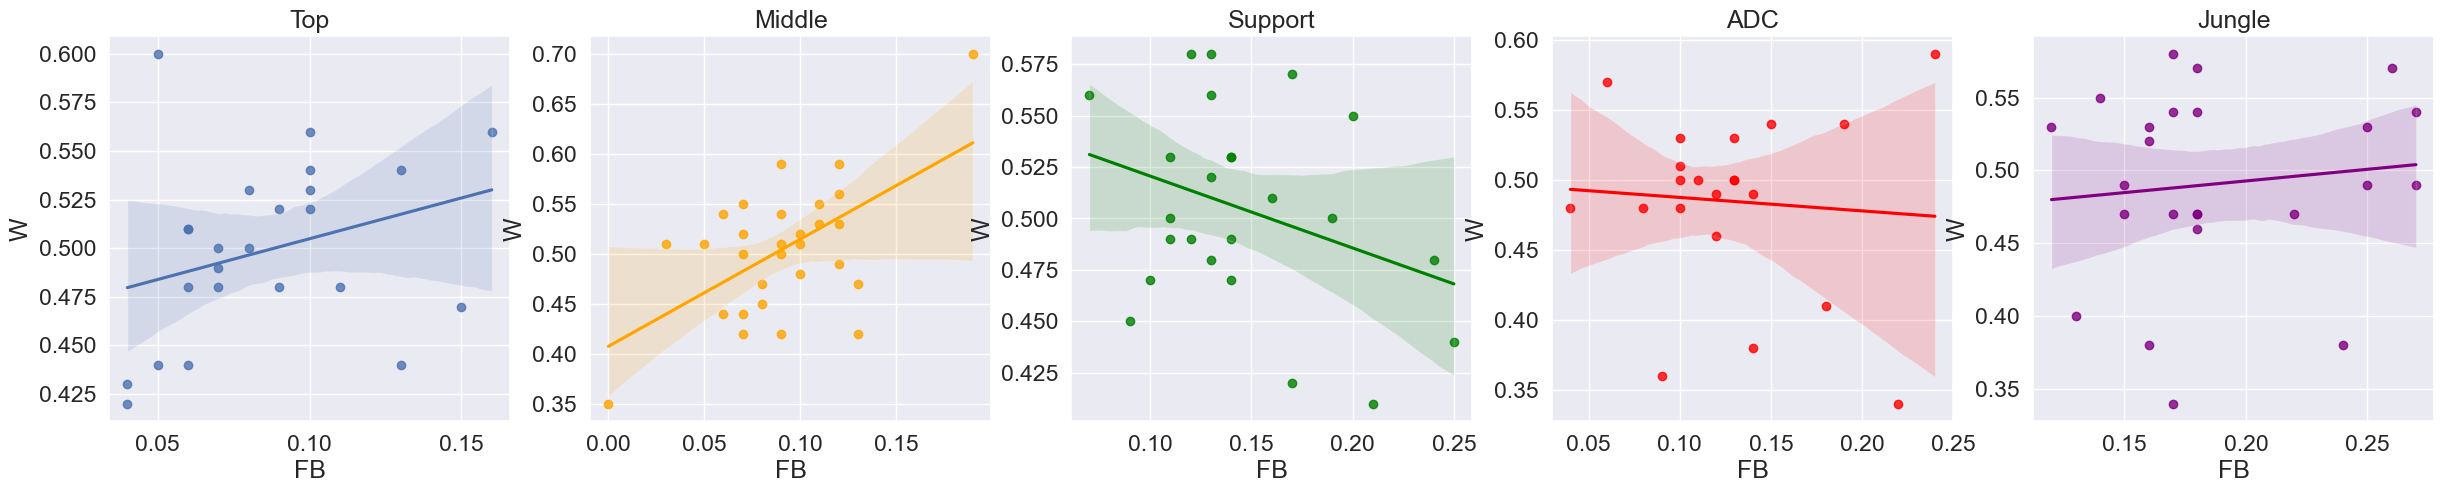

In [84]:
fig,ax = plt.subplots(ncols=5,figsize=(30,5))
ax[0].set_title("Top")
ax[1].set_title("Middle")
ax[2].set_title("Support")
ax[3].set_title("ADC")
ax[4].set_title("Jungle")

for a in ax:
    a.set_xlabel('First Blood')

sb.regplot(data=w_relation.loc[w_relation['Pos']=='Top',:],x='FB',y='W',ax=ax[0])
sb.regplot(data=w_relation.loc[w_relation['Pos']=='Middle',:],x='FB',y='W',ax=ax[1],color='orange')
sb.regplot(data=w_relation.loc[w_relation['Pos']=='Support',:],x='FB',y='W',ax=ax[2],color='green')
sb.regplot(data=w_relation.loc[w_relation['Pos']=='ADC',:],x='FB',y='W',ax=ax[3],color='red')
sb.regplot(data=w_relation.loc[w_relation['Pos']=='Jungle',:],x='FB',y='W',ax=ax[4],color='purple')

